# Cleaning data preprocessing data nyemil.csv

In [2]:
import pandas as pd
import numpy as np

In [12]:
# Load Data 
df1 = pd.read_csv('nyemil.csv', usecols=['fat', 'sugar', 'sodium'])
df1.head()

,fat,sugar,sodium
0,9.3 g,0 g,775 mg
1,14 g,8 g,1070 mg
2,3.5 g,19 g,30 mg
3,21.9 g,4.9 g,388.6 mg
4,43.5 g,9.7 g,870 mg


In [16]:
# Clean Unnecessary string
df1['fat'] = df1['fat'].str.replace(' g', '')
df1['sugar'] = df1['sugar'].str.replace(' g', '')
df1['sodium'] = df1['sodium'].str.replace(' mg', '')
df1.head()

,fat,sugar,sodium
0,9.3,0,775
1,14,8,1070
2,3.5,19,30
3,21.9,4.9,388.6
4,43.5,9.7,870


In [20]:
# Change data type to float
df1 = df1.apply(lambda x: x.astype(float))
df1.info()

# Convert data sodium from mg to g
df1['sodium'] = df1['sodium'] / 1000
df1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283 entries, 0 to 282
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   fat     283 non-null    float64
 1   sugar   283 non-null    float64
 2   sodium  283 non-null    float64
dtypes: float64(3)
memory usage: 6.8 KB


,fat,sugar,sodium
0,9.3,0.0,0.7750
1,14.0,8.0,1.0700
2,3.5,19.0,0.0300
3,21.9,4.9,0.3886
4,43.5,9.7,0.8700


# Cleaning data and preprocessing fatsecret.csv

In [27]:
# Load data
df2 = pd.read_csv('fatsecret.csv', usecols=['fat', 'sugar', 'sodium'])
df2.head()

,fat,sugar,sodium
0,"5,00g","0,00g",20mg
1,"3,00g","1,00g",15mg
2,"5,00g","1,00g",15mg
3,"7,00g","0,00g",10mg
4,"3,00g",0,20mg


In [29]:
# Clear unnecessary string
df2['fat'] = df2['fat'].str.replace('g', '')
df2['sugar'] = df2['sugar'].str.replace('g', '')
df2['sodium'] = df2['sodium'].str.replace('mg', '')

# Replace "," with "."
df2['fat'] = df2['fat'].str.replace(',', '.')
df2['sugar'] = df2['sugar'].str.replace(',', '.')
df2['sodium'] = df2['sodium'].str.replace(',', '.')

df.head()

,fat,sugar,sodium
0,9.3,0.0,0.775
1,14.0,8.0,1.07
2,3.5,19.0,0.03
3,21.9,4.9,0.3886
4,43.5,9.7,0.87


In [30]:
# Change data type to float
df2 = df2.apply(lambda x: x.astype(float))
df2.info()

# Convert data sodium from mg to g 
df2['sodium'] = df2['sodium'] / 1000
df2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8444 entries, 0 to 8443
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   fat     8444 non-null   float64
 1   sugar   8444 non-null   float64
 2   sodium  8444 non-null   float64
dtypes: float64(3)
memory usage: 198.0 KB


,fat,sugar,sodium
0,5.0,0.0,0.020
1,3.0,1.0,0.015
2,5.0,1.0,0.015
3,7.0,0.0,0.010
4,3.0,0.0,0.020


In [31]:
df = pd.concat([df1, df2], ignore_index=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8727 entries, 0 to 8726
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   fat     8727 non-null   float64
 1   sugar   8727 non-null   float64
 2   sodium  8727 non-null   float64
dtypes: float64(3)
memory usage: 204.7 KB


In [34]:
# make nutrition grade based on standar pangan publish by standarpangan.pom.go.id
# and Add to dataframe
# A grade will not exced 10% from standar pangan
# B grade will within range 10-25% from standar pangan
# C grade will within range 25-50% from standar pangan
# D grade above 50% and exed 10% from standar pangan

def calculate_grade(row):
    fat_limit = 67
    sugar_limit = 50
    sodium_limit = 5
    
    fat_grade = 'D'
    if row['fat'] <= fat_limit * 0.1:
        fat_grade = 'A'
    elif row['fat'] <= fat_limit * 0.25 and row['fat'] > fat_limit * 0.1:
        fat_grade = 'B'
    elif row['fat'] <= fat_limit * 0.5 and row['fat'] > fat_limit * 0.25:
        fat_grade = 'C'
    
    sugar_grade = 'D'
    if row['sugar'] <= sugar_limit * 0.1:
        sugar_grade = 'A'
    elif row['sugar'] <= sugar_limit * 0.25 and row['sugar'] > sugar_limit * 0.1:
        sugar_grade = 'B'
    elif row['sugar'] <= sugar_limit * 0.5 and row['sugar'] > sugar_limit * 0.25:
        sugar_grade = 'C'
    
    sodium_grade = 'D'
    if row['sodium'] <= sodium_limit * 0.1:
        sodium_grade = 'A'
    elif row['sodium'] <= sodium_limit * 0.25 and row['sodium'] > sodium_limit * 0.1:
        sodium_grade = 'B'
    elif row['sodium'] <= sodium_limit * 0.5 and row['sodium'] > sodium_limit * 0.25:
        sodium_grade = 'C'
    
    if fat_grade == sugar_grade == sodium_grade == 'A':
        return 'A'
    elif fat_grade == sugar_grade == sodium_grade == 'B':
        return 'B'
    elif 'C' in [fat_grade, sugar_grade, sodium_grade] and 'D' not in [fat_grade, sugar_grade, sodium_grade]:
        return 'C'
    else:
        return 'D'

df['grade'] = df.apply(calculate_grade, axis=1)
df.head()

,fat,sugar,sodium,grade
0,9.3,0.0,0.7750,D
1,14.0,8.0,1.0700,B
2,3.5,19.0,0.0300,C
3,21.9,4.9,0.3886,C
4,43.5,9.7,0.8700,D


In [35]:
print(df['grade'].value_counts())
df.info()

grade
D    3564
A    3291
C    1840
B      32
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8727 entries, 0 to 8726
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   fat     8727 non-null   float64
 1   sugar   8727 non-null   float64
 2   sodium  8727 non-null   float64
 3   grade   8727 non-null   object 
dtypes: float64(3), object(1)
memory usage: 272.8+ KB


In [36]:
df.to_csv('clean_data.csv', index=False, header=True, encoding='utf-8')

# Training Model 

In [37]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

2024-05-25 17:43:52.144605: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-25 17:43:52.152639: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-05-25 17:43:52.283911: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-25 17:43:54.771818: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [38]:
# Load data
df = pd.read_csv('clean_data.csv')

In [39]:
# Take the data features
X = df[['fat', 'sugar', 'sodium']].values

# Encode the target variable 'grade' as numerical values
le = LabelEncoder()
y = le.fit_transform(df['grade'])

In [40]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
# Create the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, input_shape=(3,), activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(len(le.classes_), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the result
loss, accuracy = model.evaluate(X_test, y_test)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

/home/user/model-gizilo/.venv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4692 - loss: 1.2046 - val_accuracy: 0.7938 - val_loss: 0.6138
Epoch 2/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7998 - loss: 0.5532 - val_accuracy: 0.8860 - val_loss: 0.4483
Epoch 3/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8588 - loss: 0.4029 - val_accuracy: 0.9049 - val_loss: 0.3707
Epoch 4/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8754 - loss: 0.3405 - val_accuracy: 0.8694 - val_loss: 0.3121
Epoch 5/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9011 - loss: 0.2860 - val_accuracy: 0.8981 - val_loss: 0.2679
Epoch 6/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9144 - loss: 0.2470 - val_accuracy: 0.9307 - val_loss: 0.2265
Epoch 7/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9344 - loss: 0.2066 - val_accuracy: 0.9170 - val_loss: 0.2118
Epoch 8/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9381 - loss: 0.1868 - val_accu

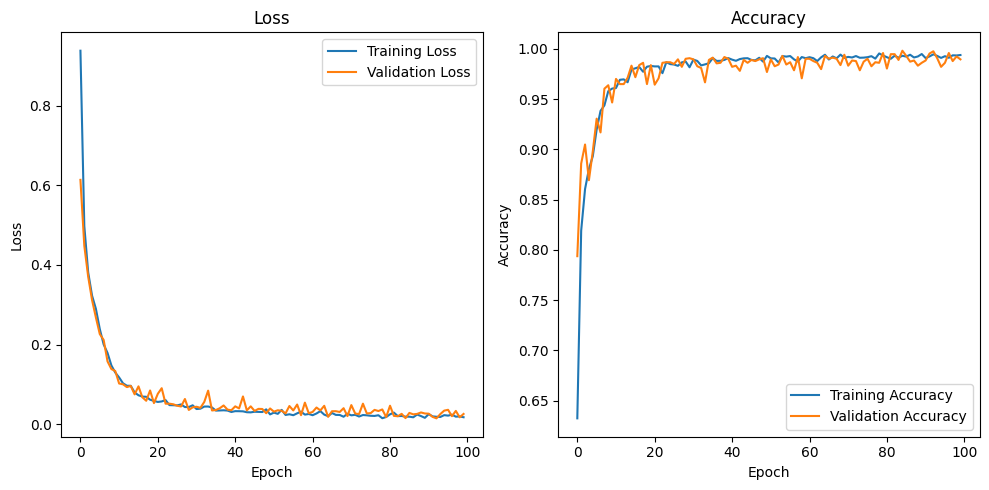

In [42]:
# Plot the loss and accuracy
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [43]:
# Test the model to make predictions
predictions = model.predict(X_test)
predicted_grades = le.inverse_transform(np.argmax(predictions, axis=1))
actual_grades = le.inverse_transform(y_test)

# Print the prediction results
for i in range(len(X_test)):
    print(f"Actual Grade: {actual_grades[i]}, Predicted Grade: {predicted_grades[i]}")

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Actual Grade: D, Predicted Grade: D
Actual Grade: D, Predicted Grade: D
Actual Grade: A, Predicted Grade: A
Actual Grade: A, Predicted Grade: A
Actual Grade: A, Predicted Grade: A
Actual Grade: C, Predicted Grade: C
Actual Grade: A, Predicted Grade: A
Actual Grade: D, Predicted Grade: D
Actual Grade: A, Predicted Grade: A
Actual Grade: D, Predicted Grade: D
Actual Grade: C, Predicted Grade: C
Actual Grade: C, Predicted Grade: C
Actual Grade: A, Predicted Grade: A
Actual Grade: D, Predicted Grade: D
Actual Grade: A, Predicted Grade: A
Actual Grade: D, Predicted Grade: D
Actual Grade: C, Predicted Grade: C
Actual Grade: D, Predicted Grade: D
Actual Grade: A, Predicted Grade: A
Actual Grade: A, Predicted Grade: A
Actual Grade: D, Predicted Grade: D
Actual Grade: C, Predicted Grade: C
Actual Grade: D, Predicted Grade: D
Actual Grade: A, Predicted Grade: A
Actual Grade: D, Predicted Grade: D
Actual Grade: D, Predicted Grade: D
Actual Grade: D, Predicte

In [ ]:
model.save("nutrient.h5")